In [1]:
from sunpy.net import Fido, attrs as a
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# start and stop times
timestart_1 = '2007/12/6'
timestop_1 = '2007/12/7'
timestart_2 = '2007/12/6'
timestop_2 = '2007/12/7'

In [3]:
result = Fido.search(a.Time(timestart_1, timestop_1), a.Instrument.secchi)

In [4]:
result_2 = Fido.search(a.Time(timestart_2, timestop_2), a.Instrument.secchi)

In [5]:
#To show if data is full
result_2, result

(<sunpy.net.fido_factory.UnifiedResponse object at 0x0000022800833B20>
 Results from 1 Provider:
 
 3979 Results from the VSOClient:
 Source: http://vso.stanford.edu/cgi-bin/search
 Total estimated size: 23.171 Gbyte
 
        Start Time       ...                  Info                 
                         ...                                       
 ----------------------- ... --------------------------------------
 2007-12-06 00:05:00.000 ...   COR1 ;  ; SERIES ; 0deg. ; 1024x1024
 2007-12-06 00:05:09.000 ... COR1 ;  ; SERIES ; 120deg. ; 1024x1024
 2007-12-06 00:05:18.000 ... COR1 ;  ; SERIES ; 240deg. ; 1024x1024
 2007-12-06 00:05:30.000 ...           EUVI ;  ; NORMAL ; 2048x2048
 2007-12-06 00:05:30.000 ...   COR1 ;  ; SERIES ; 0deg. ; 1024x1024
 2007-12-06 00:05:30.000 ...   COR1 ;  ; SERIES ; 0deg. ; 1024x1024
 2007-12-06 00:05:39.000 ... COR1 ;  ; SERIES ; 120deg. ; 1024x1024
 2007-12-06 00:05:39.000 ... COR1 ;  ; SERIES ; 120deg. ; 1024x1024
 2007-12-06 00:05:48.000 ... COR1

In [6]:
# Filtering for COR1 and COR2 data only
infos = set()
degree_filtered_results = {0: [], 120: [], 240: [], 1001: []}
for r in result[0]:
    infos.add(r['Info'])
    if 'COR1' in r['Info'] and r['Source'] == "STEREO_A":
        if " 0deg." in r['Info']:
            degree_filtered_results[0].append(r)
        elif " 120deg." in r['Info']:
            degree_filtered_results[120].append(r)
        elif " 240deg." in r['Info']:
            degree_filtered_results[240].append(r)
        elif " 1001deg." in r['Info']:
            degree_filtered_results[1001].append(r)
degree_filtered_results_2 = {0: [], 120: [], 240: [], 1001: []}
for r in result_2[0]:
    infos.add(r['Info'])
    if 'COR2' in r['Info'] and r['Source'] == "STEREO_A":
        if " 0deg." in r['Info']:
            degree_filtered_results_2[0].append(r)
        elif " 120deg." in r['Info']:
            degree_filtered_results_2[120].append(r)
        elif " 240deg." in r['Info']:
            degree_filtered_results_2[240].append(r)
        elif " 1001deg." in r['Info']:
            degree_filtered_results_2[1001].append(r)

In [7]:
fn000 = Fido.fetch(degree_filtered_results[0][0], path='C://Users//ecyrb//Documents//Python_Files//Data images')
fn120 = Fido.fetch(degree_filtered_results[120][0], path='C://Users//ecyrb//Documents//Python_Files//Data images')
fn240 = Fido.fetch(degree_filtered_results[240][0], path='C://Users//ecyrb//Documents//Python_Files//Data images')

fn000_1 = Fido.fetch(degree_filtered_results_2[0][0], path='C://Users//ecyrb//Documents//Python_Files//Data images')
fn120_2 = Fido.fetch(degree_filtered_results_2[120][0], path='C://Users//ecyrb//Documents//Python_Files//Data images')
fn240_3 = Fido.fetch(degree_filtered_results_2[240][0], path='C://Users//ecyrb//Documents//Python_Files//Data images')



Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [8]:
# clear = Fido.fetch(degree_filtered_results[1001][0],  path='C://Users//ecyrb//Documents//Python_Files//Data images')

In [9]:
#opening fits files for extrapolation 
with fits.open(fn000[0]) as hdul:
    data000 = hdul[0].data
    
with fits.open(fn120[0]) as hdul:
    data120 = hdul[0].data
    
with fits.open(fn240[0]) as hdul:
    data240 = hdul[0].data
    
with fits.open(fn000_1[0]) as hdul:
    data000_1 = hdul[0].data
    
with fits.open(fn120_2[0]) as hdul:
    data120_2 = hdul[0].data
    
with fits.open(fn240_3[0]) as hdul:
    data240_3 = hdul[0].data

In [10]:
# vmin, vmax = 0, 5E3
# fig, axs = plt.subplots(ncols=1, figsize=(12, 4), sharex=True, sharey=True)
# axs.imshow(data120, vmin=vmin, vmax=vmax)
# axs.set_title("120 degrees")
# fig.show()

<IPython.core.display.Javascript object>


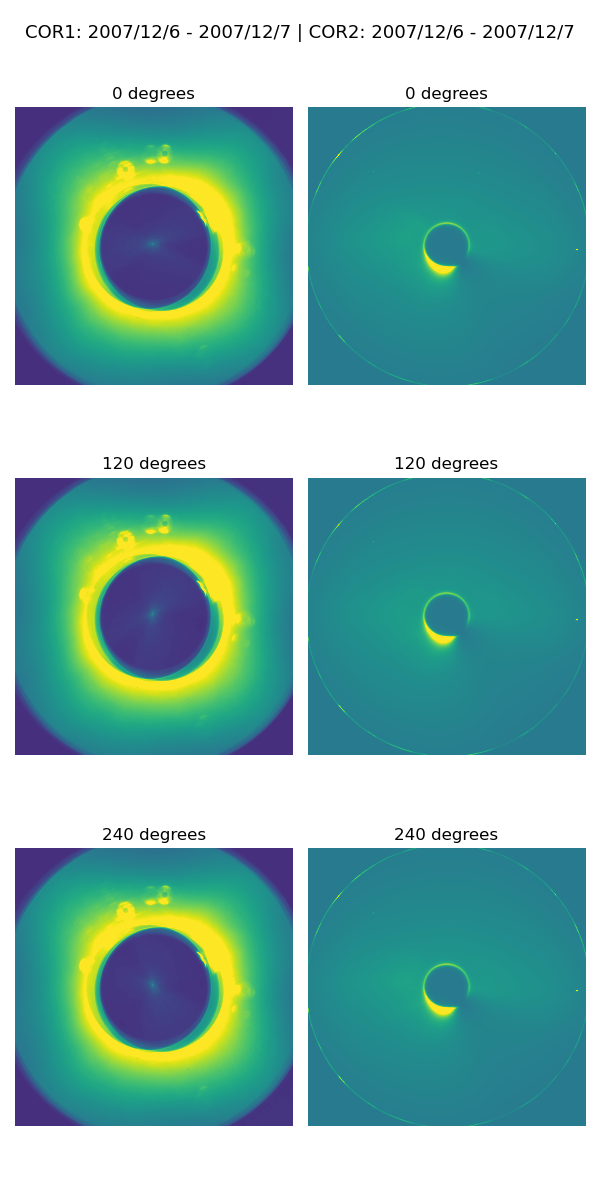

In [11]:

vmin, vmax = 0, 5E3
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(6, 12))#, sharex=True, sharey=True)
axs[0,0].imshow(data000, vmin=vmin, vmax=vmax)
axs[0,0].set_title("0 degrees")
axs[1,0].imshow(data120, vmin=vmin, vmax=vmax)
axs[1,0].set_title("120 degrees")
axs[2,0].imshow(data240, vmin=vmin, vmax=vmax)
axs[2,0].set_title("240 degrees")
axs[0,1].imshow(data000_1, vmin=vmin, vmax=vmax)
axs[0,1].set_title("0 degrees")
axs[1,1].imshow(data120_2, vmin=vmin, vmax=vmax)
axs[1,1].set_title("120 degrees")
axs[2,1].imshow(data240_3, vmin=vmin, vmax=vmax)
axs[2,1].set_title("240 degrees")
for ax in axs.flatten():
    ax.set_axis_off()
fig.suptitle('COR1: ' + timestart_1 + ' - ' + timestop_1 +' | ' + 'COR2: ' + timestart_2 + ' - ' + timestop_2, fontsize=13)
fig.tight_layout()
#fig.savefig("cor2.png")
fig.show()

In [145]:
infos

{'COR1 ;  ; SERIES ; 0deg. ; 1024x1024',
 'COR1 ;  ; SERIES ; 120deg. ; 1024x1024',
 'COR1 ;  ; SERIES ; 240deg. ; 1024x1024',
 'COR2 ;  ; DOUBLE   ; 1001deg. ; 2048x2048',
 'COR2 ;  ; NORMAL   ; 0deg. ; 2048x2048',
 'COR2 ;  ; NORMAL   ; 120deg. ; 2048x2048',
 'COR2 ;  ; NORMAL   ; 240deg. ; 2048x2048',
 'COR2 ;  ; NORMAL ; 0deg. ; 2048x2048',
 'COR2 ;  ; NORMAL ; 120deg. ; 2048x2048',
 'EUVI ;  ; NORMAL ; 2048x2048',
 'HI1 ;  ; NORMAL ; 2176x2048',
 'HI1 ;  ; SERIES ; 1024x1024',
 'HI2 ;  ; NORMAL ; 2176x2048',
 'HI2 ;  ; SERIES   ; 1024x1024'}